Câu 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def get_collum(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    N = len(data)
    tv_data = get_collum(data,0)
    radio_data = get_collum(data,1)
    newspaper_data = get_collum(data,2)

    #  get sale (index =3)

    sales_data = get_collum(data,3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

X , y = prepare_data('advertising.csv')
list = [ sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [7]:
# def initialize_params():
#     w1 = random.gauss(mu =0.0 , sigma =0.01)
#     w2 = random.gauss(mu =0.0 , sigma =0.01)
#     w3 = random.gauss(mu =0.0 , sigma =0.01)
#     b = 0
#     return w1 , w2 , w3 , b
def initialize_params () :
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)
    return w1 , w2 , w3 , b
    

In [9]:
def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
    result = w1*x1 + w2*x2 + w3*x3 +b
    return result

In [10]:
# Câu 2
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print (y)

1.0


In [68]:
def compute_loss(y_hat, y):
    loss = np.mean((y_hat-y)**2)
    return loss

In [41]:
# Câu 3
l = compute_loss(y_hat =1, y =0.5)
print (l)

1.6487212707001282


In [42]:
# compute gradient
def compute_gradient_wi (xi , y , y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi
def compute_gradient_b (y , y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

In [17]:
# Câu 4
# MSE loss
g_wi = compute_gradient_wi(xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [18]:
# Câu 5
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [43]:
def update_weight_wi ( wi , dl_dwi , lr ) :
    wi = wi - lr*dl_dwi
    return wi
def update_weight_b (b , dl_db , lr ) :
    b = b-lr*dl_db
    return b

In [25]:
# Cau 6
after_wi = update_weight_wi(wi =1.0, dl_dwi= -0.5, lr = 0.000005)
print (after_wi)

1.0000025


In [26]:
# Cau 7
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 0.000005)
print( after_b )
print( after_wi )

0.500005
1.0000025


In [44]:
def implement_linear_regression ( X_data, y_data, epoch_max = 50 , lr = 1e-5):
    losses = []
    w1 , w2 , w3 , b = initialize_params()

    N = len(y_data)
    for epoch in range (epoch_max) :
        for i in range (N):
        # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y  = y_data[i]

            # compute output
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
            #  compute loss
            loss = compute_loss(y , y_hat )

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )
            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b (b , dl_db , lr )
            losses.append( loss )
            (w1 , w2 , w3 ,b , losses)  = implement_linear_regression (X , y )
            plt.plot( losses [:100])
            plt.xlabel("# iteration ")
            plt.ylabel(" Loss ")
            plt.show ()
    return ( w1 , w2 , w3 ,b , losses )

In [33]:

X , y = prepare_data ('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
( w1 , w2 , w3 )

(0.07405984066396477, 0.15917360263437663, 0.017561197559948935)

In [38]:
# cau 9
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression(X , y)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


In [49]:
def compute_loss_mae(y_hat, y):
    loss = np.mean(abs(y_hat-y))
    return loss

In [51]:
# Cau 10
l = compute_loss_mae( y_hat =1 , y =0.5)
print(l)


0.5


[0.9776739955545999, 0.9407639514389093, 0.9054474634949011, 0.8716536715157838, 0.8393149596095558, 0.8083668034457254, 0.7787476248815559, 0.7503986536031221, 0.7232637954349072, 0.6972895069890239, 0.6724246763417496, 0.6486205094407194, 0.6258304219610301, 0.6040099363426346, 0.5831165837548272, 0.5631098107463354, 0.5439508903516331, 0.5256028374355324, 0.5080303280690187, 0.4911996227395987, 0.4750784932092664, 0.45963615284246, 0.4448431902352625, 0.43067150598545384, 0.4170942524509963, 0.40408577635211174, 0.3916215640792517, 0.3796781895761253, 0.368233264673376, 0.3572653917546772, 0.3467541186428383, 0.33667989559906014, 0.3270240343337404, 0.3177686689322296, 0.3088967186036925, 0.3003918521657308, 0.2922384541817131, 0.2844215926718325, 0.27692698832276436, 0.26974098512448935, 0.26285052236631673, 0.2562431079274745, 0.24990679280077732, 0.2438301467908692, 0.23800223533140002, 0.23241259736818068, 0.2270512242579412, 0.22190853963475365, 0.21697538019850537, 0.212242977

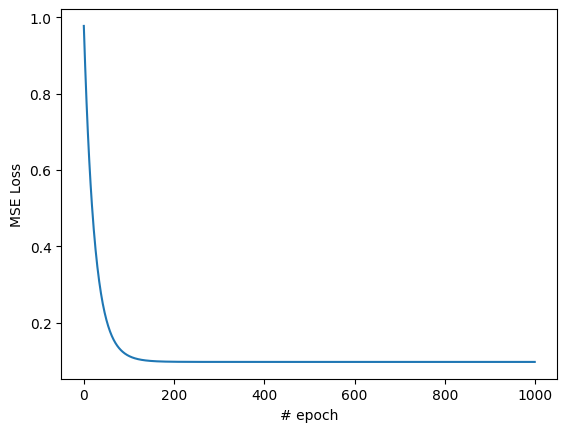

0.8868710135890012 0.3014087347572931 0.0013873442314859868


In [67]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss(y, y_hat)
            
            # accumulate loss
            loss_total += loss
            
            # compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)  # Thêm dòng này
            
            # accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db  # Thêm dòng này
        
        # update parameters using average gradients
        w1 = w1 - lr * (dw1_total / N)
        w2 = w2 - lr * (dw2_total / N)
        w3 = w3 - lr * (dw3_total / N)
        b = b - lr * (db_total / N)
        
        losses.append(loss_total / N)
    
    print(losses)
    plt.plot(losses)
    plt.xlabel("# epoch")
    plt.ylabel("MSE Loss")
    plt.show()
    return (w1, w2, w3, b, losses)

X, y = prepare_data('advertising.csv')
# using MSE loss with adjusted learning rate
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=0.01)
print(w1, w2, w3)